## Classification and Regression for Inofrmed Sampling (CRIS)

#### CRIS does initial to final state interpolation as well as informed sampling of parameter space.

#### In this demo we consider a grid of binary MESA runs and their outcomes.

In [1]:
from cris.data import TableData
from cris.classify import Classifier
from cris.regress import Regressor
from cris.sample import Sampler

Inheretance structure for the classes in CRIS:
- ***TableData*** holds all data for the classifiers and regressors to train on
- ***Classifier*** and ***Regressor*** inheret TableData objects
- ***Sampler*** inherets both ***Classifier*** and ***Regressor*** objects

To create a ***TableData*** object, a file path or Pandas DataFrame must be given. If using files, the names of inputs, outputs, and the classification column must be given.

In [2]:
files = ["data/data_-2.500.dat",
         "data/data_-2.625.dat",
         "data/data_-2.750.dat"]

input_cols = ['log10(M_1i)(Msun)', 'P_i(days)', 'metallicity' ]

output_cols = ['result', 'had_contact', 'M_1f(Msun)', 'M_2f(Msun)', 'P_f(days)', 
               'merge_time(Gyr)', 'Kerr_param_1', 'Kerr_param_2', 
               'he_core_mass_1', 'c_core_mass_1', 'total_mass_h1_1', 
               'total_mass_he4_1', 'he_core_mass_2', 'c_core_mass_2', 
               'total_mass_h1_2', 'total_mass_he4_2']

class_col_name = 'result'

table_object = TableData( files, input_cols, output_cols, class_col_name, 
                          ignore_lines = 15, omit_vals=["convergence_error"],
                          verbose=True )


Reading in data from 3 file(s).
	'BH_data/data_-2.500.dat'
	'BH_data/data_-2.625.dat'
	'BH_data/data_-2.750.dat'
Finished reading data.

 - Removed 1972 rows containing: convergence_error
Removed a total of 1972 rows.
Total number of data points: 21083

Input columns: 3
Output columns: 16
Unique classes found in 'result': 5
Using default class colors.

Finding values to regress:
Num output(s) 	 Class Name
      1 	 'L2_overflow'
     15 	 'PISN'
      1 	 'ZAMS_L2_overflow'
     15 	 'double_BH'
      0 	 'off_CHE'

Calculate Average Distances & Average Percent Change
class: 'L2_overflow'
	APC4_had_contact
class: 'PISN'
	 -- 432 zeros in 'had_contact'. Skipping p_change...
	APC4_M_1f(Msun)
	APC4_M_2f(Msun)
	APC4_P_f(days)
	APC4_merge_time(Gyr)
	APC4_Kerr_param_1
	APC4_Kerr_param_2
	APC4_he_core_mass_1
	 -- 795 zeros in 'c_core_mass_1'. Skipping p_change...
	APC4_total_mass_h1_1
	APC4_total_mass_he4_1
	APC4_he_core_mass_2
	 -- 795 zeros in 'c_core_mass_2'. Skipping p_change...
	APC4_tot

If the data has 3 input axes, the classification data can be plotted by slicing along the 3rd axis.

In [ ]:
TableData()

Axes: log10(M_1i)(Msun), P_i(days), metallicity


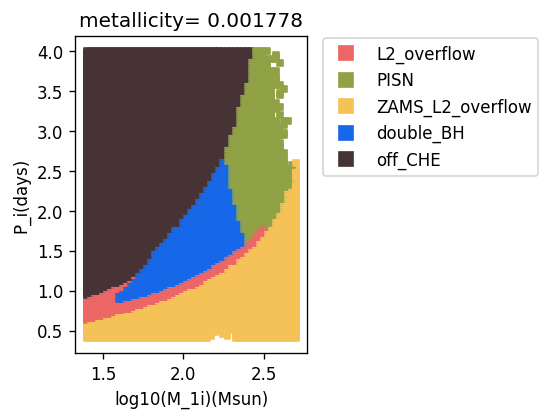

In [3]:
table_object.plot_3D_class_data( fig_size=(2.5,3.5), which_val=0 )

###### Some other methods of interest in TableData

In [10]:
#table_object.get_all_class_data()
#table_object.get_all_regr_data()
#table_object.get_binary_mapping_per_class()
#table_object.get_data()
#table_object.get_info()
#table_object.info()

-----------

Now that we have created a ***TableData*** object, we can pass it along to the ***Classifier*** and ***Regressor***. 

In [123]:
import numpy as np

classifier_obj = Classifier( table_object )

classifier_obj.train("rbf", di=np.arange(0,21083,10), verbose=True)

N points: 2109
Time to fit 5 classifiers ~ 6.619

RBF class 0 -- current time: 1.324
RBF class 1 -- current time: 1.916
RBF class 2 -- current time: 2.359
RBF class 3 -- current time: 2.827
RBF class 4 -- current time: 3.324
	dict loc: RBF L2_overflow
	dict loc: RBF PISN
	dict loc: RBF ZAMS_L2_overflow
	dict loc: RBF double_BH
	dict loc: RBF off_CHE
Done training RBF.


-----------

In [9]:
regressor_obj = Regressor( table_object )

regressor_obj.train("linear", ["PISN", "double_BH"], None, verbose=True)

	 Training on all 27 columns in 'PISN'...
--- Fit LinearNDInterpolator ---
PISN: had_contact - 915 training points
PISN: M_1f(Msun) - 915 training points
PISN: M_2f(Msun) - 915 training points
PISN: P_f(days) - 915 training points
PISN: merge_time(Gyr) - 915 training points
PISN: Kerr_param_1 - 915 training points
PISN: Kerr_param_2 - 915 training points
PISN: he_core_mass_1 - 915 training points
PISN: c_core_mass_1 - 915 training points
PISN: total_mass_h1_1 - 915 training points
PISN: total_mass_he4_1 - 915 training points
PISN: he_core_mass_2 - 915 training points
PISN: c_core_mass_2 - 915 training points
PISN: total_mass_h1_2 - 915 training points
PISN: total_mass_he4_2 - 915 training points
PISN: APC4_M_1f(Msun) - 915 training points
PISN: APC4_M_2f(Msun) - 915 training points
PISN: APC4_P_f(days) - 915 training points
PISN: APC4_merge_time(Gyr) - 915 training points
PISN: APC4_Kerr_param_1 - 915 training points
PISN: APC4_Kerr_param_2 - 915 training points
PISN: APC4_he_core_mass

The linear ND interpolator has trained on columns in the class "PISN" and "double_BH". Now a trained interpolator is stored for each of these data sets in the ***Regressor*** object.

Some of the columns have prefixes "APC4_" indicating Average Percent Change (or fractional change) in 4 nearest neghbors for differnt columns. These values were specified when the ***TableData*** object was created.

Now that we have trained interpolators we can call them. First we will generate some random input data in the range of the original data table:

In [60]:
regr_random_in = regressor_obj.get_rnd_test_inputs("PISN", 4)

print(regr_random_in)

[[2.32957031e+00 1.94517751e+00 1.83729542e-03]
 [2.29884581e+00 1.73294913e+00 1.85925036e-03]
 [2.60100441e+00 3.69779459e+00 2.13191164e-03]
 [2.60029137e+00 3.17087314e+00 1.96012908e-03]]


Notice that the input is 3 dimensional and it has a shape of number of queries by number of input axes.

In [61]:
preds = regressor_obj.get_predictions(["linear"], 
                                      ["PISN", "double_BH"], 
                                      ["M_1f(Msun)", "P_f(days)"], 
                                       regr_random_in )
print( preds )

{'LinearNDInterpolator': {'PISN': {'M_1f(Msun)': array([        nan,         nan,         nan, 74.84641568]), 'P_f(days)': array([        nan,         nan,         nan, 85.16760885])}, 'double_BH': {'M_1f(Msun)': array([58.13961786, 55.08804477,         nan,         nan]), 'P_f(days)': array([23.86997243, 20.18387416,         nan,         nan])}}}


The output is an organized dictionary where the outermost key is the interpolator. The next key is a specific class and then the final key is the column. That column key points to an array of the predicted values by the interpolator.

For the LinearNDInterpolator, a value of nan is returned if you query a point outside the convex hull contructed by the interpolator. In other words, if the point does not exist within the range of training data, the interpolator has no way to extrapolate values and returns nan. You will see a good amount of nan value handing throught the code if you use the linear interpolator.

('LinearNDInterpolator', ': 517 nan points out of 3130. Used rbf instead.')


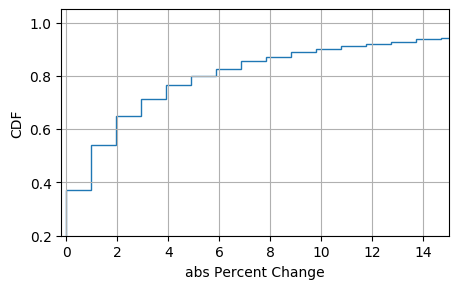

In [118]:
perc_diff, diffs = regressor_obj.cross_validate("Linear", "double_BH", "P_f(days)", 0.05)

import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(5,3))
plt.hist(abs(perc_diff), bins=100, cumulative=True, 
         histtype='step', density=True)
plt.xlabel("abs Percent Change"); plt.ylabel("CDF"); 
plt.xlim(-0.2,15); plt.ylim(0.2,1.05); plt.grid()
plt.show()

Plotting all regression data from class 'PISN'.


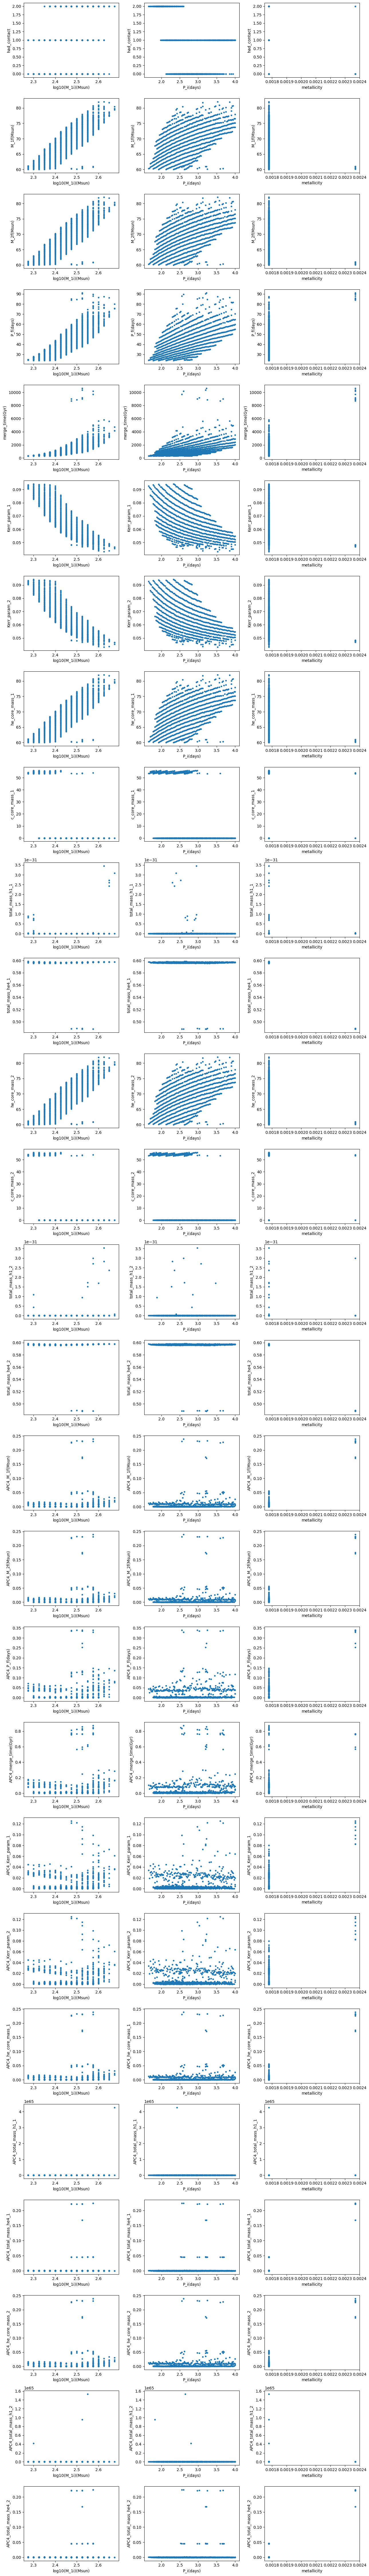

In [119]:
# if you want to see all the regression data in a given class...
regressor_obj.plot_regr_data("PISN")

-------------

Now it's time to explain the ***Sampler***.

In [ ]:
# writing the demo for cris
# writing GP notes - met with J(h?)uanga
# adding code to cris to help with the sampling (scotty and monica)

In [14]:
sampler_obj = Sampler( classifier = classifier_obj, regressor= regressor_obj )

sampler_obj.run_MCMC(10, 1, [[0,0,0]], sampler_obj.classifier_target_dist, 'rbf'  )

Exception: 

No trained interpolators exist.

In [ ]:
files = ["data/synth_data.dat"]

input_cols = ['', 'P_i(days)', 'metallicity' ]
